## ANLY 590 - HW 1 

### Beixuan Jia

### Part 1

In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [20]:
hit = pd.read_csv('Hitters.csv')

In [21]:
hit.head(10)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
6,-Al Newman,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.0,A
7,-Argenis Salazar,298,73,0,24,24,7,3,509,108,...,41,37,12,A,W,121,283,9,100.0,A
8,-Andres Thomas,323,81,6,26,32,8,2,341,86,...,32,34,8,N,W,143,290,19,75.0,N
9,-Andre Thornton,401,92,17,49,66,65,13,5206,1332,...,784,890,866,A,E,0,0,0,1100.0,A


In [22]:
hit = hit.drop(['Unnamed: 0', 'League','Division','NewLeague'],axis=1)

In [23]:
hit.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


Since the Salary variable has a large standard deviation, replacing Salary by mean or median might not be a good strategy. We might have to drop the missing values.

In [24]:
hit = hit.dropna()

In [25]:
Xs = hit.drop(['Salary'], axis=1)
y = hit['Salary'].values.reshape(-1,1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, train_size=0.8)

In [27]:
features = X_train.columns.values
features=list(features)

In [28]:
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train[features])

In [29]:
X_test= scaler.fit_transform(X_test[features])

In [30]:
y_train = scaler.fit_transform(y_train)

In [31]:
y_test = scaler.fit_transform(y_test)

### Multiple Linear Regression 

Predict Salary from the other numeric predictors:

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
MSE_train = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [35]:
MSE_test = cross_val_score(model, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)

In [36]:
mean_MSE_train = np.mean(MSE_train)
mean_MSE_test = np.mean(MSE_test)

In [37]:
print(mean_MSE_train)

-0.6865488828751672


In [38]:
print(mean_MSE_test)

-1.1085137955252056


The training MSE is smaller than the testing MSE, which implies that there might be an overfitting issue.

### 1.1 Lasso Regression

In [40]:
lasso = Lasso()

In [41]:
parameters = {'alpha': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 25, 30, 50, 70, 100, 150, 300, 500]}

In [52]:
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

In [53]:
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 25, 30, 50, 70, 100, 150, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [65]:
print("The optimal value of the Lasso regularization penality is", lasso_regressor.best_params_)

The optimal value of the Lasso regularization penality is {'alpha': 0.01}


In [66]:
print("The best score with the optimal value of the Lasso regularization penality is", lasso_regressor.best_score_)

The best score with the optimal value of the Lasso regularization penality is -0.664234276563193


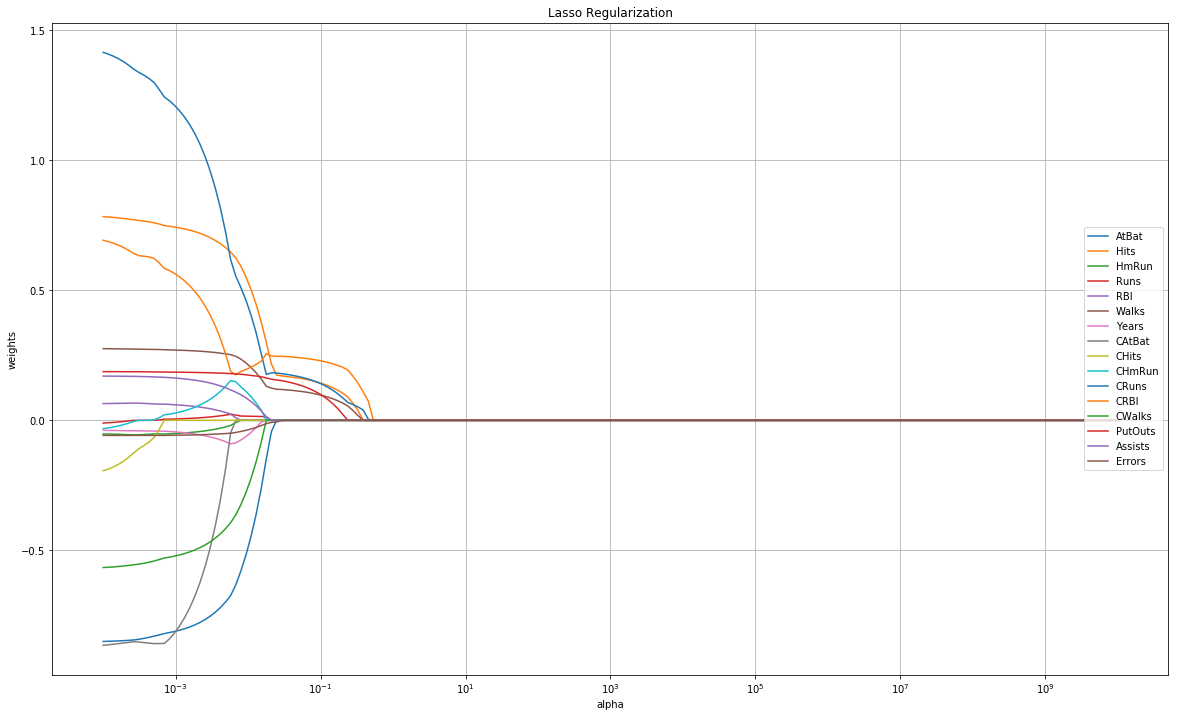

In [46]:
alphas = np.logspace(-4, 10, 200)

coefs = []

for a in alphas:
    lasso_vis = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso_vis.fit(X_train, y_train)
    coefs.append(lasso_vis.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log', basex = 10)
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso Regularization')
plt.axis('tight')
plt.grid(True)
plt.legend(features, loc = 'right')
fig = plt.gcf()
fig.set_size_inches(20, 12)
fig.savefig('test2png.png', dpi=100)
plt.show()

As the visualization of the coefficient trajectories shown, the final three predictors that remain in the model are "Hits", "AtBat", and "CRBI". These 3 precitors might be the most important variables in explaining the change of the salary. 

In [51]:
best_coefs = []

for a in alphas:
    lasso_best = linear_model.Lasso(alpha=0.01, fit_intercept=False)
    lasso_best.fit(X_train, y_train)
    best_coefs.append(lasso_best.coef_)
    
print(best_coefs[1])

[-0.48872024  0.53174215 -0.          0.01600799  0.          0.21349182
 -0.0558928  -0.          0.          0.10314513  0.43826072  0.19912401
 -0.25585282  0.17415546  0.08077753 -0.0363995 ]


There are 12 predictors left in the model with the optimal value of penalty term.

### Ridge Regression

In [56]:
from sklearn.linear_model import LassoCV,Lasso,Ridge,RidgeCV
ridge = Ridge()

In [61]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

In [62]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 25, 30, 50, 70, 100, 150, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [67]:
print("The optimal value of the Ridge regularization penality is", ridge_regressor.best_params_)

The optimal value of the Ridge regularization penality is {'alpha': 100}


In [68]:
print("The best score with the optimal value of the Ridge regularization penality is", ridge_regressor.best_score_)

The best score with the optimal value of the Ridge regularization penality is -0.6471684473411611


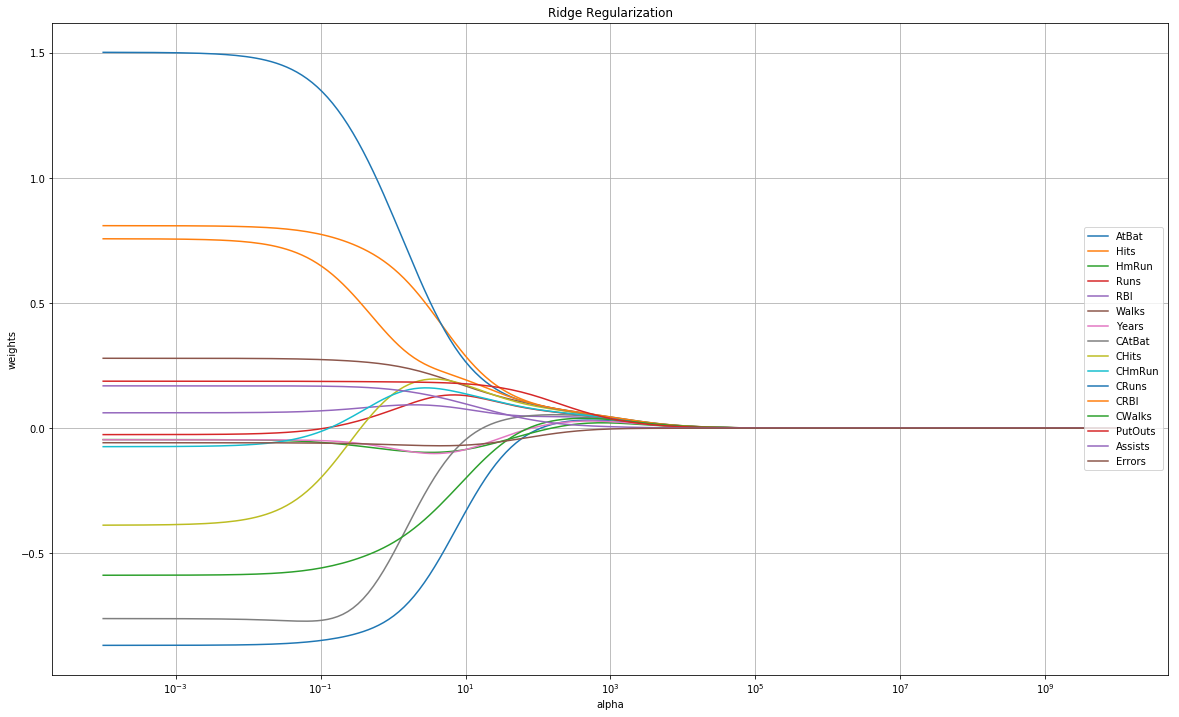

In [69]:
alphas = np.logspace(-4, 10, 200)
coeffs = np.zeros((len(alphas), X_train.shape[1]))


for n, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    
# Display results

ax = plt.gca()

ax.plot(alphas, coeffs)
ax.set_xscale('log', basex = 10)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Regularization')
plt.axis('tight')
plt.grid(True)
plt.legend(features, loc = 'right')
fig = plt.gcf()
fig.set_size_inches(20, 12)
#fig.savefig('test2png.png', dpi=100)
plt.show()

### Part 2

The bias-variance tradeoff refers to the following situations: 
    1. When models fail to capture the overall relations among data, they tend to have high bias and low variance. This situation is called underfitting. 
    2. When models capture too many details, including noises among data, they tend to have low bias and high variance. This situation is called overfitting.

Regularization is an approach to avoid overfitting by adding the penalty term. As the penalty term increases, the training MSE will keep increasing, whereas the testing MSE will decreases first until it hits the optimal penalty value, and then increases.

As Part 1 shown, the absolute value of training MSE is smaller than that of the testing MSE, which implies that there might be an overfitting issue. After the Lasso Regularization, the testing MSE has been decreased, indicating that the overfitting problem has been modified. 